# Анализ рынка по вакансиям "Аналитик данных" и "Бизнес аналитик" с сайта HH.ru

Баркова Юлия
Тг @Nenenez

Цель проекта: выявить значительные различия среди вакансий на должности "аналитик данных" и "бизнес-аналитик" на сайте HH.ru.

Данные получены из api сайта HH.ru. Данные прошли предварительную обработку и очистку.

- `id`	- Уникальный идентификатор вакансии.

- `name` - Название вакансии.

- `published_at` - Дата публикации.

- `alternate_url` - Ссылка на вакансию.

- `type` - Статус вакансии на момент получения данных от api и передачи их в базу. База все время пополняется.

- `employer` - Работодатель.

- `department` - Работодатель, отдел.

- `area` - Регион места работы.

- `experience` - Требуемый опыт работы.

- `key_skills` - Ключевые навыки, в том числе найденные при анализе полного текста вакансии. Поле генерируется после получения информации от api. При желании можно дополнить.

- `schedule` - График работы.

- `employment` - Тип занятости.

- `description` - Описание вакансии.

- `description_lemmatized` - Лемматизированное описание вакансии.

- `salary_from` - Нижняя граница предлагаемой заработной платы.

- `salary_to` - Верхняя граница предлагаемой заработной платы.

- `salary_bin` - Категория зарплаты.

- `key_skills_from_key_skills_field` - Ключевые навыки из поля вакансии key_skills.

- `hard_skills_from_description`	- “Твердые” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api. При желании можно дополнить.

- `soft_skills_from_description` - “Мягкие” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api. При желании можно дополнить.

## Загрузка данных

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Ссылка на данные по вакансиям бизнес-аналитиков
https://docs.google.com/spreadsheets/d/1XhFvssCfZIPbJzr_MTqblL4BN7t_f2Tf/edit?usp=drive_link

Ссылка на данные по вакансиям дата-аналитиков https://docs.google.com/spreadsheets/d/1xbbsiIlGNZWTPu2_k6H7M9s2oUWSl_0t/edit?usp=drive_link

In [18]:
!pip install --upgrade gdown

In [19]:
! gdown -- 1XhFvssCfZIPbJzr_MTqblL4BN7t_f2Tf
# скачиваю датасет про бизнес аналитиков

Downloading...
From: https://drive.google.com/uc?id=1XhFvssCfZIPbJzr_MTqblL4BN7t_f2Tf
To: /content/vacancies_ba_new.xlsx
100% 6.93M/6.93M [00:00<00:00, 52.3MB/s]


In [20]:
data_ba = pd.read_excel('/content/vacancies_ba_new.xlsx')
# сохраняю датасет в переменную
data_ba.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,49470036,Бизнес-аналитик,2024-01-29 21:09:56,https://hh.ru/vacancy/49470036,Открытая,ICS Consulting,NaN,Москва,Junior+ (1-3 years),"['Умение работать с людьми', 'Документация', '...",Полный день,Полная занятость,на основе конкурсного отбора обязанности учас...,основа конкурсный отбор обязанность участие ко...,90000.0,120000.0,От 100 тысяч до 200 тысяч,"Грамотность, Деловая переписка, Умение работат...",NaN,"Коммуникация, Документация, Переговоры"
1,55186681,"Проектный бизнес-аналитик 1С (ERP, УХ, КА, УТ,...",2024-01-10 11:00:30,https://hh.ru/vacancy/55186681,Открытая,Первый Бит,NaN,Москва,Middle (3-6 years),"['1С: Документооборот', '1С: Управление Произв...",Полный день,Полная занятость,"привет, будущий коллега!мы приглашаем проектны...",привет будущий коллега приглашать проектный ан...,NaN,NaN,ЗП не указана,"Управление проектами, Бизнес-анализ, Системный...",NaN,NaN
2,67043806,Бизнес-аналитик,2023-11-15 17:46:22,https://hh.ru/vacancy/67043806,Открытая,Digital Design,NaN,Москва,Junior+ (1-3 years),"['Разработка проектной документации', 'Электро...",Полный день,Полная занятость,digital design более четверти века разрабатыва...,digital design четверть век разрабатывать внед...,NaN,NaN,ЗП не указана,"Разработка проектной документации, Разработка ...",NaN,"Коммуникация, Документация"
3,67345392,"Бизнес-аналитик (по логистике морских портов, ...",2024-01-17 12:53:15,https://hh.ru/vacancy/67345392,Открытая,СОЛВО,NaN,Санкт-Петербург,Middle (3-6 years),"['IDEF0', 'Документация', 'Аналитическое мышле...",Полный день,Полная занятость,солво – лидер российского рынка it решений для...,солво лидер российский рынок it решение автома...,NaN,NaN,ЗП не указана,"UML, BPMN, IDEF0, Английский язык, IDEF",NaN,"Документация, Аналитическое мышление"
4,67498251,Бизнес-аналитик в Банк,2024-01-29 12:05:14,https://hh.ru/vacancy/67498251,Открытая,Сателл ИТ,NaN,Москва,Junior+ (1-3 years),"['Бизнес-анализ', 'Документация']",Удаленная работа,Полная занятость,"обязанности: анализ бизнес-процессов; сбор, а...",обязанность анализ бизнес процесс сбор анализ ...,200000.0,NaN,ЗП не указана,Бизнес-анализ,NaN,Документация


In [21]:
data_ba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4171 entries, 0 to 4170
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                4171 non-null   int64         
 1   name                              4171 non-null   object        
 2   published_at                      4171 non-null   datetime64[ns]
 3   alternate_url                     4171 non-null   object        
 4   type                              4171 non-null   object        
 5   employer                          4171 non-null   object        
 6   department                        651 non-null    object        
 7   area                              4171 non-null   object        
 8   experience                        4171 non-null   object        
 9   key_skills                        4171 non-null   object        
 10  schedule                          4171 non-null 

In [22]:
! gdown -- 1xbbsiIlGNZWTPu2_k6H7M9s2oUWSl_0t
# скачиваю датасет про дата аналитиков

Downloading...
From: https://drive.google.com/uc?id=1xbbsiIlGNZWTPu2_k6H7M9s2oUWSl_0t
To: /content/vacancies_da_new.xlsx
100% 1.29M/1.29M [00:00<00:00, 112MB/s]


In [23]:
data_da = pd.read_excel('/content/vacancies_da_new.xlsx')
# сохраняю датасет в переменную
data_da.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,50293361,Аналитик данных (Data analyst),2024-01-29 12:16:08,https://hh.ru/vacancy/50293361,Открытая,"Красное & Белое, розничная сеть",NaN,Москва,Junior+ (1-3 years),"['MS SQL', 'Power Pivot', 'Прогнозирование', '...",Полный день,Полная занятость,для решение разнообразных и интересных задач в...,решение разнообразный интересный задача команд...,NaN,NaN,ЗП не указана,"SQL, VBA, MS SQL, MS PowerPoint, Анализ данных...",NaN,Коммуникация
1,79046568,Data Analyst / Специалист по веб-аналитике,2023-11-03 09:49:29,https://hh.ru/vacancy/79046568,Открытая,НОНТОН.РФ,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Яндекс.Директ', 'Маркетинговый анализ', 'Кон...",Полный день,Полная занятость,крупная мебельная компания в поиске web-аналит...,крупный мебельный компания поиск web аналитик ...,120000.0,200000.0,От 200 тысяч до 300 тысяч,"Google Analytics, Яндекс.Метрика, Веб-аналитик...",NaN,NaN
2,79115520,Senior Data Analyst,2023-10-15 10:00:10,https://hh.ru/vacancy/79115520,Открытая,СБЕР,Сбер. Data Science,Москва,Middle (3-6 years),[],Полный день,Полная занятость,команда сеть продаж сбера ищет руководителя на...,команда сеть продажа сбер искать руководитель ...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
3,79598893,Data Analyst (SQL),2023-12-04 09:31:34,https://hh.ru/vacancy/79598893,Открытая,WILDBERRIES,NaN,Москва,Junior+ (1-3 years),"['SQL', 'Управленческая отчетность', 'OLAP', '...",Полный день,Полная занятость,wildberries — это крупнейшая в странах еаэс ме...,wildberries крупный страна еаэс международный ...,NaN,NaN,ЗП не указана,"SQL, Управленческая отчетность, SQL запросы, E...",NaN,NaN
4,80616218,Data Analyst,2023-12-03 14:43:59,https://hh.ru/vacancy/80616218,Открытая,Контакт,NaN,Санкт-Петербург,Junior+ (1-3 years),"['SQL', 'confluence', 'Документация', 'Jira', ...",Полный день,Полная занятость,мы строим современную и технологичную финтех-к...,строить современный технологичный финтех компа...,NaN,NaN,ЗП не указана,"Power BI, SQL, Jira, Confluence",confluence,Документация


In [24]:
data_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                786 non-null    int64         
 1   name                              786 non-null    object        
 2   published_at                      786 non-null    datetime64[ns]
 3   alternate_url                     786 non-null    object        
 4   type                              786 non-null    object        
 5   employer                          786 non-null    object        
 6   department                        188 non-null    object        
 7   area                              786 non-null    object        
 8   experience                        786 non-null    object        
 9   key_skills                        786 non-null    object        
 10  schedule                          786 non-null    

In [25]:
data_da.duplicated('id').sum()

0

In [26]:
data_ba.duplicated('id').sum()

0

## Предобработка данных

### Объединение таблиц

In [27]:
# создаю новый столбец в таблице, чтобы при дальнейшем объединении был признак отвечающий из какого датафрейма информация

data_ba['df'] = 'business_analyst'
data_da['df'] = 'data_analyst'

data_ba.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,df
0,49470036,Бизнес-аналитик,2024-01-29 21:09:56,https://hh.ru/vacancy/49470036,Открытая,ICS Consulting,NaN,Москва,Junior+ (1-3 years),"['Умение работать с людьми', 'Документация', '...",...,Полная занятость,на основе конкурсного отбора обязанности учас...,основа конкурсный отбор обязанность участие ко...,90000.0,120000.0,От 100 тысяч до 200 тысяч,"Грамотность, Деловая переписка, Умение работат...",NaN,"Коммуникация, Документация, Переговоры",business_analyst
1,55186681,"Проектный бизнес-аналитик 1С (ERP, УХ, КА, УТ,...",2024-01-10 11:00:30,https://hh.ru/vacancy/55186681,Открытая,Первый Бит,NaN,Москва,Middle (3-6 years),"['1С: Документооборот', '1С: Управление Произв...",...,Полная занятость,"привет, будущий коллега!мы приглашаем проектны...",привет будущий коллега приглашать проектный ан...,NaN,NaN,ЗП не указана,"Управление проектами, Бизнес-анализ, Системный...",NaN,NaN,business_analyst
2,67043806,Бизнес-аналитик,2023-11-15 17:46:22,https://hh.ru/vacancy/67043806,Открытая,Digital Design,NaN,Москва,Junior+ (1-3 years),"['Разработка проектной документации', 'Электро...",...,Полная занятость,digital design более четверти века разрабатыва...,digital design четверть век разрабатывать внед...,NaN,NaN,ЗП не указана,"Разработка проектной документации, Разработка ...",NaN,"Коммуникация, Документация",business_analyst
3,67345392,"Бизнес-аналитик (по логистике морских портов, ...",2024-01-17 12:53:15,https://hh.ru/vacancy/67345392,Открытая,СОЛВО,NaN,Санкт-Петербург,Middle (3-6 years),"['IDEF0', 'Документация', 'Аналитическое мышле...",...,Полная занятость,солво – лидер российского рынка it решений для...,солво лидер российский рынок it решение автома...,NaN,NaN,ЗП не указана,"UML, BPMN, IDEF0, Английский язык, IDEF",NaN,"Документация, Аналитическое мышление",business_analyst
4,67498251,Бизнес-аналитик в Банк,2024-01-29 12:05:14,https://hh.ru/vacancy/67498251,Открытая,Сателл ИТ,NaN,Москва,Junior+ (1-3 years),"['Бизнес-анализ', 'Документация']",...,Полная занятость,"обязанности: анализ бизнес-процессов; сбор, а...",обязанность анализ бизнес процесс сбор анализ ...,200000.0,NaN,ЗП не указана,Бизнес-анализ,NaN,Документация,business_analyst


In [28]:
# вертикально объединяю таблицы, чтобы сразу выполнять предобработку по всем данным
df = pd.concat([data_ba, data_da], ignore_index=True)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4957 entries, 0 to 4956
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                4957 non-null   int64         
 1   name                              4957 non-null   object        
 2   published_at                      4957 non-null   datetime64[ns]
 3   alternate_url                     4957 non-null   object        
 4   type                              4957 non-null   object        
 5   employer                          4957 non-null   object        
 6   department                        839 non-null    object        
 7   area                              4957 non-null   object        
 8   experience                        4957 non-null   object        
 9   key_skills                        4957 non-null   object        
 10  schedule                          4957 non-null 

In [30]:
df1 = df.copy()

In [31]:
df1.duplicated('id').sum()
# проверяю есть ли дубликаты после соединения таблиц

2

In [32]:
df1[df1.duplicated('id')]

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,df
4507,89159672,Senior Business Analyst / Data analyst,2024-01-19 18:11:27,https://hh.ru/vacancy/89159672,Открытая,Robusta,NaN,Москва,Middle (3-6 years),"['Business Analysis', 'Аналитическое мышление'...",...,Полная занятость,мы вывели на рынок несколько успешных it-проек...,выводить рынок несколько успешный it проект со...,NaN,NaN,ЗП не указана,"Системное мышление, Сбор и анализ информации, ...",NaN,NaN,data_analyst
4645,90026921,Бизнес-аналитик (Data analyst),2023-11-28 11:06:27,https://hh.ru/vacancy/90026921,Открытая,СБЕР,Сбер. IT,Москва,Middle (3-6 years),"['Python', 'Pandas', 'SQL', 'Data Analysis', '...",...,Полная занятость,наша команда занимается внедрением data driven...,наш команда заниматься внедрение data driven р...,NaN,NaN,ЗП не указана,"Python, SQL, Pandas, Data Analysis, Hadoop, Ан...",Pandas,Проактивность,data_analyst


Найдено 2 дубликата, в наименовании указан и дата и бизнес аналитик, удалять их не буду, так как хочу, чтобы эти данные учитывались при анализе каждой группы

### Удаление ненужных столбцов

In [33]:
# удаляю столбцы, которые не буду использовать при анализе (ссылку на вакансию и обработанные скриптом поля с ключевыми навыками)
df1 = df1.drop(
    ['alternate_url', 'description', 'description_lemmatized', 'hard_skills_from_description', 'soft_skills_from_description'] ,
    axis=1)
df1.head(10)

,id,name,published_at,type,employer,department,area,experience,key_skills,schedule,employment,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,df
0,49470036,Бизнес-аналитик,2024-01-29 21:09:56,Открытая,ICS Consulting,NaN,Москва,Junior+ (1-3 years),"['Умение работать с людьми', 'Документация', '...",Полный день,Полная занятость,90000.0,120000.0,От 100 тысяч до 200 тысяч,"Грамотность, Деловая переписка, Умение работат...",business_analyst
1,55186681,"Проектный бизнес-аналитик 1С (ERP, УХ, КА, УТ,...",2024-01-10 11:00:30,Открытая,Первый Бит,NaN,Москва,Middle (3-6 years),"['1С: Документооборот', '1С: Управление Произв...",Полный день,Полная занятость,NaN,NaN,ЗП не указана,"Управление проектами, Бизнес-анализ, Системный...",business_analyst
2,67043806,Бизнес-аналитик,2023-11-15 17:46:22,Открытая,Digital Design,NaN,Москва,Junior+ (1-3 years),"['Разработка проектной документации', 'Электро...",Полный день,Полная занятость,NaN,NaN,ЗП не указана,"Разработка проектной документации, Разработка ...",business_analyst
3,67345392,"Бизнес-аналитик (по логистике морских портов, ...",2024-01-17 12:53:15,Открытая,СОЛВО,NaN,Санкт-Петербург,Middle (3-6 years),"['IDEF0', 'Документация', 'Аналитическое мышле...",Полный день,Полная занятость,NaN,NaN,ЗП не указана,"UML, BPMN, IDEF0, Английский язык, IDEF",business_analyst
4,67498251,Бизнес-аналитик в Банк,2024-01-29 12:05:14,Открытая,Сателл ИТ,NaN,Москва,Junior+ (1-3 years),"['Бизнес-анализ', 'Документация']",Удаленная работа,Полная занятость,200000.0,NaN,ЗП не указана,Бизнес-анализ,business_analyst
5,67583250,Бизнес-аналитик системы «Проект-СМАРТ Про»,2023-12-18 10:35:28,Открытая,Кейсистемс,NaN,Чебоксары,Junior+ (1-3 years),"['MS SQL', 'Системное мышление', 'ERP Systems'...",Полный день,Полная занятость,70000.0,NaN,ЗП не указана,"SQL, MS SQL, MS SQL Server, Системное мышление...",business_analyst
6,69025937,Бизнес-аналитик (Направление по развитию систе...,2024-01-08 13:20:21,Открытая,Деловые Линии,NaN,Санкт-Петербург,Middle (3-6 years),"['Работа в команде', 'Аналитическое мышление',...",Полный день,Полная занятость,NaN,NaN,ЗП не указана,"MS PowerPoint, Работа в команде, Аналитическое...",business_analyst
7,69727116,Бизнес-аналитик,2024-01-17 10:44:56,Открытая,ЭЛЕКТРОННЫЕ ОФИСНЫЕ СИСТЕМЫ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,NaN,NaN,ЗП не указана,NaN,business_analyst
8,71110662,Младший бизнес-аналитик,2024-01-29 18:06:45,Открытая,Бизнес Технологии,NaN,Керчь,Junior+ (1-3 years),"['Аналитическое мышление', 'Документация']",Полный день,Полная занятость,60000.0,NaN,ЗП не указана,NaN,business_analyst
9,71214153,Бизнес-аналитик (по разработке ПО),2023-11-10 17:30:17,Открытая,BI Consult,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Python', 'Pandas', 'SQL', 'Data Analysis', '...",Полный день,Полная занятость,NaN,NaN,ЗП не указана,"Tableau, Python, SQL, Power BI, Управление про...",business_analyst


### Предобработка категории зарплаты

In [34]:
df1.salary_bin.unique()

array(['От 100 тысяч до 200 тысяч', 'ЗП не указана', 'Меньше 100 тысяч',
       'От 200 тысяч до 300 тысяч', 'Больше 300 тысяч'], dtype=object)

In [35]:
# создаю функцию для определения категории зарплаты, так как в датасете не везде категории указаны корректно на мой взгляд
def categorize_salary(row):
    if pd.isnull(row['salary_from']) and pd.isnull(row['salary_to']):
        return '1. ЗП не указана'
    elif pd.isnull(row['salary_to']) and row['salary_from'] < 100000:
        return '2. Меньше 100 тысяч'
    elif pd.isnull(row['salary_to']) and 100000 <= row['salary_from'] < 200000:
        return '3. От 100 тысяч до 200 тысяч'
    elif pd.isnull(row['salary_to']) and 200000 <= row['salary_from'] < 300000:
        return '4. От 200 тысяч до 300 тысяч'
    elif pd.isnull(row['salary_to']) and row['salary_from'] >= 300000:
        return '5. Больше 300 тыс'
    elif pd.notnull(row['salary_to']) and row['salary_to'] < 100000:
        return '2. Меньше 100 тысяч'
    elif pd.notnull(row['salary_to']) and 100000 <= row['salary_to'] < 200000:
        return '3. От 100 тысяч до 200 тысяч'
    elif pd.notnull(row['salary_to']) and 200000 <= row['salary_to'] < 300000:
        return '4. От 200 тысяч до 300 тысяч'
    elif pd.notnull(row['salary_to']) and row['salary_to'] >= 300000:
        return '5. Больше 300 тыс'

# применяю функцию к DataFrame для обновления столбца salary_bin
df1['salary_bin'] = df1.apply(categorize_salary, axis=1)

df1.head(20)

,id,name,published_at,type,employer,department,area,experience,key_skills,schedule,employment,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,df
0,49470036,Бизнес-аналитик,2024-01-29 21:09:56,Открытая,ICS Consulting,NaN,Москва,Junior+ (1-3 years),"['Умение работать с людьми', 'Документация', '...",Полный день,Полная занятость,90000.0,120000.0,3. От 100 тысяч до 200 тысяч,"Грамотность, Деловая переписка, Умение работат...",business_analyst
1,55186681,"Проектный бизнес-аналитик 1С (ERP, УХ, КА, УТ,...",2024-01-10 11:00:30,Открытая,Первый Бит,NaN,Москва,Middle (3-6 years),"['1С: Документооборот', '1С: Управление Произв...",Полный день,Полная занятость,NaN,NaN,1. ЗП не указана,"Управление проектами, Бизнес-анализ, Системный...",business_analyst
2,67043806,Бизнес-аналитик,2023-11-15 17:46:22,Открытая,Digital Design,NaN,Москва,Junior+ (1-3 years),"['Разработка проектной документации', 'Электро...",Полный день,Полная занятость,NaN,NaN,1. ЗП не указана,"Разработка проектной документации, Разработка ...",business_analyst
3,67345392,"Бизнес-аналитик (по логистике морских портов, ...",2024-01-17 12:53:15,Открытая,СОЛВО,NaN,Санкт-Петербург,Middle (3-6 years),"['IDEF0', 'Документация', 'Аналитическое мышле...",Полный день,Полная занятость,NaN,NaN,1. ЗП не указана,"UML, BPMN, IDEF0, Английский язык, IDEF",business_analyst
4,67498251,Бизнес-аналитик в Банк,2024-01-29 12:05:14,Открытая,Сателл ИТ,NaN,Москва,Junior+ (1-3 years),"['Бизнес-анализ', 'Документация']",Удаленная работа,Полная занятость,200000.0,NaN,4. От 200 тысяч до 300 тысяч,Бизнес-анализ,business_analyst
5,67583250,Бизнес-аналитик системы «Проект-СМАРТ Про»,2023-12-18 10:35:28,Открытая,Кейсистемс,NaN,Чебоксары,Junior+ (1-3 years),"['MS SQL', 'Системное мышление', 'ERP Systems'...",Полный день,Полная занятость,70000.0,NaN,2. Меньше 100 тысяч,"SQL, MS SQL, MS SQL Server, Системное мышление...",business_analyst
6,69025937,Бизнес-аналитик (Направление по развитию систе...,2024-01-08 13:20:21,Открытая,Деловые Линии,NaN,Санкт-Петербург,Middle (3-6 years),"['Работа в команде', 'Аналитическое мышление',...",Полный день,Полная занятость,NaN,NaN,1. ЗП не указана,"MS PowerPoint, Работа в команде, Аналитическое...",business_analyst
7,69727116,Бизнес-аналитик,2024-01-17 10:44:56,Открытая,ЭЛЕКТРОННЫЕ ОФИСНЫЕ СИСТЕМЫ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,NaN,NaN,1. ЗП не указана,NaN,business_analyst
8,71110662,Младший бизнес-аналитик,2024-01-29 18:06:45,Открытая,Бизнес Технологии,NaN,Керчь,Junior+ (1-3 years),"['Аналитическое мышление', 'Документация']",Полный день,Полная занятость,60000.0,NaN,2. Меньше 100 тысяч,NaN,business_analyst
9,71214153,Бизнес-аналитик (по разработке ПО),2023-11-10 17:30:17,Открытая,BI Consult,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Python', 'Pandas', 'SQL', 'Data Analysis', '...",Полный день,Полная занятость,NaN,NaN,1. ЗП не указана,"Tableau, Python, SQL, Power BI, Управление про...",business_analyst


### Предобработка ключевых навыков

In [36]:
# заменяю двойные пробелы на один пробел
df1['key_skills'] = df1['key_skills'].str.replace('  ', ' ')

In [37]:
# привожу все буквы к нижнему регистру
df1['key_skills'] = df1['key_skills'].str.lower()
# код для вывода разных вариаций 1С, закомментирован, чтобы вывод не занимал много места
#df1[df1['key_skills'].str.contains('1с', case=False)]['key_skills'].unique()

In [38]:
# создаю список для замены значений
replace_list = ['1с: документооборот',
 '1с: управление производственным предприятием',
 '1с: управление холдингом',
 '1с: финансы',
 'erp-системы на базе 1с',
 '1с: управление предприятием',
 '1с: управление торговлей',
 '1с: комплексная автоматизация',
 '1с: упп', '1с: предприятие: управление строительной организациейт',
 '1с: предприятие 8',
 '1с: предприятие: бухгалтерский учет',
 '1 с предприятие',
 'методолог 1с', '1с: бухгалтерия',
 '1с: управление персоналом',
 '1с: зарплата и управление персоналом',
 '1c: erp', '1с аналитик',
 '1с: erp',
 '1с: бухгалтерия предприятия',
 '1с программирование',
 '1с-битрикс',
                '1с казначейство',
                '1С: финансы',
                '1С erp',
                '1С: упп',
                '1с: предприятие: управление строительной организацией',
                '1С предприятия',
                '1С: бухгалтерия',
                '1с:ка', '1с:erp.ух', '1с:консолидация', '1с: предприятие',
                '!с: управление нашей фирмой'
                '1c', '1с'
                ]
cc='1С'

# прохожу по каждому ключевому навыку и заменяем его на '1С' в столбце key_skills
df1['key_skills'] = df1['key_skills'].replace(replace_list, cc, regex = True)

df1.head()

,id,name,published_at,type,employer,department,area,experience,key_skills,schedule,employment,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,df
0,49470036,Бизнес-аналитик,2024-01-29 21:09:56,Открытая,ICS Consulting,NaN,Москва,Junior+ (1-3 years),"['умение работать с людьми', 'документация', '...",Полный день,Полная занятость,90000.0,120000.0,3. От 100 тысяч до 200 тысяч,"Грамотность, Деловая переписка, Умение работат...",business_analyst
1,55186681,"Проектный бизнес-аналитик 1С (ERP, УХ, КА, УТ,...",2024-01-10 11:00:30,Открытая,Первый Бит,NaN,Москва,Middle (3-6 years),"['1С', '1С', '1С', '1c: финансы', 'работа в ко...",Полный день,Полная занятость,NaN,NaN,1. ЗП не указана,"Управление проектами, Бизнес-анализ, Системный...",business_analyst
2,67043806,Бизнес-аналитик,2023-11-15 17:46:22,Открытая,Digital Design,NaN,Москва,Junior+ (1-3 years),"['разработка проектной документации', 'электро...",Полный день,Полная занятость,NaN,NaN,1. ЗП не указана,"Разработка проектной документации, Разработка ...",business_analyst
3,67345392,"Бизнес-аналитик (по логистике морских портов, ...",2024-01-17 12:53:15,Открытая,СОЛВО,NaN,Санкт-Петербург,Middle (3-6 years),"['idef0', 'документация', 'аналитическое мышле...",Полный день,Полная занятость,NaN,NaN,1. ЗП не указана,"UML, BPMN, IDEF0, Английский язык, IDEF",business_analyst
4,67498251,Бизнес-аналитик в Банк,2024-01-29 12:05:14,Открытая,Сателл ИТ,NaN,Москва,Junior+ (1-3 years),"['бизнес-анализ', 'документация']",Удаленная работа,Полная занятость,200000.0,NaN,4. От 200 тысяч до 300 тысяч,Бизнес-анализ,business_analyst


In [39]:
# создаю список для замены значений
replace_list1 = ['a/b-тестирование',
                 'ab тестирование'
                ]
cc='a/b тесты'

# прохожу по каждому ключевому навыку и заменяем его на '1С' в столбце key_skills
df1['key_skills'] = df1['key_skills'].replace(replace_list1, cc, regex = True)

In [40]:
# создаю список для замены значений
replace_list2 = ['ad hoc analysi',
                 'ad hoc запросы',
                 'ad hoc',
                 'adhoc'
                ]
cc='ad-hoc'

# прохожу по каждому ключевому навыку и заменяем его в столбце key_skills
df1['key_skills'] = df1['key_skills'].replace(replace_list2, cc, regex = True)

In [41]:
# создаю список для замены значений
replace_list2 = ['bi инструмент',
                 'bi системы',
                 'bi',
                 'bi-инструмент',
                 'bi- системы',
                 'bi-системыg data',
                 'bi-системы-системыg data',
                 'bi-системы g data',
                 'power bi-системы ',
                 'bi-системы g data',
                 'power bi-системы '
                ]
cc='bi-системы '

# прохожу по каждому ключевому навыку и заменяем его в столбце key_skills
df1['key_skills'] = df1['key_skills'].replace(replace_list2, cc, regex = True)

In [42]:
# создаю список для замены значений
replace_list2 = ['bi-системы g data', 'power bi-системы ']
cc='bi-системы '

# прохожу по каждому ключевому навыку и заменяем его в столбце key_skills
df1['key_skills'] = df1['key_skills'].replace(replace_list2, cc, regex = True)

In [43]:
# создаю список для замены значений
replace_list2 = ['ms excel']
cc='excel'

# прохожу по каждому ключевому навыку и заменяем его в столбце key_skills
df1['key_skills'] = df1['key_skills'].replace(replace_list2, cc, regex = True)

In [44]:
# создаю список для замены значений
replace_list2 = ['базовые знания sql',
                 'ms sql',
                 'mysql',
                 'hypersonic sql',
                 'sql-запрос',
                 'основы sql',
                 'postgresql']
cc='sql'

# прохожу по каждому ключевому навыку и заменяем его в столбце key_skills
df1['key_skills'] = df1['key_skills'].replace(replace_list2, cc, regex = True)

In [45]:
# создаю список для замены значений
replace_list2 = ['моделирование бизнес процессов',
                 'оптимизация бизнес-процессов',
                 'описание бизнес-процессов',
                 'оптимизация бизнес процессов',
                 'управление бизнес процессами',
                 'управление процессами',
                 'разработка регламентов',
                 'реинжиниринг бизнес-процессов',
                 'моделирование процессов',
                 'анализ бизнес-процессов']

cc='управление бизнес процессами'

# прохожу по каждому ключевому навыку и заменяем его в столбце key_skills
df1['key_skills'] = df1['key_skills'].replace(replace_list2, cc, regex = True)

In [46]:
# создаю список для замены значений
replace_list2 = ['аналитика',
                 'работа с большим объемом информации',
                 'анализ бизнес показателей',
                 'системный анализ',
                 'сбор и анализ информации',
                 'data analysis',
                 'аналитические исследования']

cc='анализ данных'

# прохожу по каждому ключевому навыку и заменяем его в столбце key_skills
df1['key_skills'] = df1['key_skills'].replace(replace_list2, cc, regex = True)

In [47]:
# создаю список для замены значений
replace_list2 = ['управленческая отчетность',
                 'финансовая отчетность'
]

cc='управленческая/финансовая отчетность'

# прохожу по каждому ключевому навыку и заменяем его в столбце key_skills
df1['key_skills'] = df1['key_skills'].replace(replace_list2, cc, regex = True)

In [48]:
# создаю список для замены значений
replace_list2 = ['agile project management']

cc='agile'

# прохожу по каждому ключевому навыку и заменяем его в столбце key_skills
df1['key_skills'] = df1['key_skills'].replace(replace_list2, cc, regex = True)

In [49]:
# создаю список для замены значений
replace_list2 = ['разработка технических заданий',
                 'постановка задач разработчикам'
                 ]

cc = 'написание тз'

# прохожу по каждому ключевому навыку и заменяем его в столбце key_skills
df1['key_skills'] = df1['key_skills'].replace(replace_list2, cc, regex = True)

In [50]:
# создаю список для замены значений
replace_list2 = ['atlassian jira']

cc = 'jira'

# прохожу по каждому ключевому навыку и заменяем его в столбце key_skills
df1['key_skills'] = df1['key_skills'].replace(replace_list2, cc, regex = True)

In [51]:
# создаю список для замены значений
replace_list2 = ['atlassian confluence']

cc = 'confluence'

# прохожу по каждому ключевому навыку и заменяем его в столбце key_skills
df1['key_skills'] = df1['key_skills'].replace(replace_list2, cc, regex = True)

In [52]:
# конструкция для выведения общего списка скиллов и проверки
startwish = '['
endwish = ']'

extracted_elements = df1['key_skills'].apply(lambda x: x[x.find(startwish)+1:x.find(endwish)].split(','))

flattened_elements = [item.strip() for sublist in extracted_elements for item in sublist]

unique_elements_count = pd.Series(flattened_elements).value_counts()

skills = pd.DataFrame(flattened_elements, columns=['key_skills'])

skl = skills.groupby(by='key_skills').size().reset_index(name='count').sort_values(by='count',ascending=False).head(85)
skl.head(15)

,key_skills,count
731,'анализ данных',2116
921,'документация',2055
795,'бизнес-анализ',1492
1553,'управление бизнес процессами',1449
594,'sql',1220
763,'аналитическое мышление',1148
178,'confluence',841
1142,'написание тз',821
22,'1С',809
135,'bpmn',773


In [53]:
# удаляю строку с пустым навыком
skl = skl.drop(0)
skl.head(15)

,key_skills,count
731,'анализ данных',2116
921,'документация',2055
795,'бизнес-анализ',1492
1553,'управление бизнес процессами',1449
594,'sql',1220
763,'аналитическое мышление',1148
178,'confluence',841
1142,'написание тз',821
22,'1С',809
135,'bpmn',773


In [54]:
# создаю отдельный датафрейм для анализа навыков
df1_copy = df1.copy()
# оставляю все строки и столбцы, которые понадобятся для анализа
df1_copy = df1_copy.loc[:, ['name', 'area','experience', 'salary_bin', 'df', 'key_skills']]
df1_copy.head()

,name,area,experience,salary_bin,df,key_skills
0,Бизнес-аналитик,Москва,Junior+ (1-3 years),3. От 100 тысяч до 200 тысяч,business_analyst,"['умение работать с людьми', 'документация', '..."
1,"Проектный бизнес-аналитик 1С (ERP, УХ, КА, УТ,...",Москва,Middle (3-6 years),1. ЗП не указана,business_analyst,"['1С', '1С', '1С', '1c: финансы', 'работа в ко..."
2,Бизнес-аналитик,Москва,Junior+ (1-3 years),1. ЗП не указана,business_analyst,"['разработка проектной документации', 'электро..."
3,"Бизнес-аналитик (по логистике морских портов, ...",Санкт-Петербург,Middle (3-6 years),1. ЗП не указана,business_analyst,"['idef0', 'документация', 'аналитическое мышле..."
4,Бизнес-аналитик в Банк,Москва,Junior+ (1-3 years),4. От 200 тысяч до 300 тысяч,business_analyst,"['бизнес-анализ', 'документация']"


In [55]:
# Создаем новые столбцы в df1_copy для каждого навыка из unique_skills
for skill in skl['key_skills']:
    df1_copy[skill] = df1_copy['key_skills'].str.contains(skill)

# Выводим результат
df1_copy.head()



,name,area,experience,salary_bin,df,key_skills,'анализ данных','документация','бизнес-анализ','управление бизнес процессами',...,'аналитик 1С','airflow','dwh','организаторские навыки','решение проблем','miro','use case analysis','business studio','oracle','erp systems'
0,Бизнес-аналитик,Москва,Junior+ (1-3 years),3. От 100 тысяч до 200 тысяч,business_analyst,"['умение работать с людьми', 'документация', '...",False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Проектный бизнес-аналитик 1С (ERP, УХ, КА, УТ,...",Москва,Middle (3-6 years),1. ЗП не указана,business_analyst,"['1С', '1С', '1С', '1c: финансы', 'работа в ко...",True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,Бизнес-аналитик,Москва,Junior+ (1-3 years),1. ЗП не указана,business_analyst,"['разработка проектной документации', 'электро...",False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,"Бизнес-аналитик (по логистике морских портов, ...",Санкт-Петербург,Middle (3-6 years),1. ЗП не указана,business_analyst,"['idef0', 'документация', 'аналитическое мышле...",False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Бизнес-аналитик в Банк,Москва,Junior+ (1-3 years),4. От 200 тысяч до 300 тысяч,business_analyst,"['бизнес-анализ', 'документация']",False,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
df1_copy.pivot_table(index=['df','experience'], aggfunc='sum')

<ipython-input-56-5cba3d58cf65>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df1_copy.pivot_table(index=['df','experience'], aggfunc='sum')


'1С'  'a/b тесты'  'agile'  'airflow'  \
df               experience                                                     
business_analyst Junior (no experince)    54            0        2          0   
                 Junior+ (1-3 years)     156            3       85          1   
                 Middle (3-6 years)      129           10       55          0   
                 Senior (6+ years)         3            0        4          0   
data_analyst     Junior (no experince)     0            0        0          0   
                 Junior+ (1-3 years)       1           27        1          8   
                 Middle (3-6 years)        0           35        0         22   
                 Senior (6+ years)         1            4        0          1   

                                        'api'  'aris'  'bi-системы '  'bpmn'  \
df               experience                                                    
business_analyst Junior (no experince)      0       1              1      37   
                 Junior+ (1-3 years)       21      15             64     380   
                 Middle (3-6 years)        16      17             78     334   
                 Senior (6+ years)          7       1              3      19   
data_analyst     Junior (no experince)      0       0              3       0   
                 Junior+ (1-3 years)        5       0             92       1   
                 Middle (3-6 years)         4       0             78       2   
                 Senior (6+ years)          0       0              2       0   

                                        'business analysis'  \
df               experience                                   
business_analyst Junior (no experince)                   28   
                 Junior+ (1-3 years)                     23   
                 Middle (3-6 years)                      41   
                 Senior (6+ years)                        2   
data_analyst     Junior (no experince)                    0   
                 Junior+ (1-3 years)                      1   
                 Middle (3-6 years)                       2   
                 Senior (6+ years)                        0   

                                        'business studio'  ...  \
df               experience                                ...   
business_analyst Junior (no experince)                  0  ...   
                 Junior+ (1-3 years)                   22  ...   
                 Middle (3-6 years)                     8  ...   
                 Senior (6+ years)                      0  ...   
data_analyst     Junior (no experince)                  0  ...   
                 Junior+ (1-3 years)                    0  ...   
                 Middle (3-6 years)                     0  ...   
                 Senior (6+ years)                      0  ...   

                                        'решение проблем'  \
df               experience                                 
business_analyst Junior (no experince)                  1   
                 Junior+ (1-3 years)                   11   
                 Middle (3-6 years)                     8   
                 Senior (6+ years)                      0   
data_analyst     Junior (no experince)                  0   
                 Junior+ (1-3 years)                    4   
                 Middle (3-6 years)                     6   
                 Senior (6+ years)                      1   

                                        'системное мышление'  \
df               experience                                    
business_analyst Junior (no experince)                    12   
                 Junior+ (1-3 years)                      49   
                 Middle (3-6 years)                       46   
                 Senior (6+ years)                         2   
data_analyst     Junior (no experince)                     1   
                 Junior+ (1-3 years)                       3   
             

## Исследовательский анализ данных

In [57]:
display(df1.published_at.min())
df1.published_at.max()

Timestamp('2023-09-26 18:38:02')

Timestamp('2024-01-30 15:58:58')

В датасете представлены данные с 26 сентября 2023 года по 30 января 2024 года

### Определение наиболее желаемого кандидата по вакансиям дата аналитика и бизнес аналитика по грейдам

In [58]:
df1.pivot_table(index='experience',
                columns='df',
                values='id',
                aggfunc='count')

df,business_analyst,data_analyst
experience,,
Junior (no experince),364,25
Junior+ (1-3 years),2122,387
Middle (3-6 years),1596,355
Senior (6+ years),89,19


Среди бизнес аналитиков работодатели ищут в основном джуниоров с опытом работы от 1 года до 3 лет и мидл специалистов с опытом работы от 3 лет до 6.

Среди дата аналитиков ситуация аналогичная, но для дата аналитиков в целом вакансий значительно меньше, чем для бизнес аналитиков.

In [59]:
aa = df1_copy.loc[df1_copy['df']=='business_analyst'].pivot_table(index=['df','experience'], aggfunc='sum')

<ipython-input-59-21186c6f4dcc>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  aa = df1_copy.loc[df1_copy['df']=='business_analyst'].pivot_table(index=['df','experience'], aggfunc='sum')


In [60]:
# Отбираем 18 столбцов с наибольшими суммами значений
top_10_columns = aa.sum().nlargest(18).index

# Сортируем столбцы и оставляем только топ-10
sorted_pivot_table = aa[top_10_columns]

# Выводим результат
sorted_pivot_table

'документация'  'бизнес-анализ'  \
df               experience                                               
business_analyst Junior (no experince)             123              110   
                 Junior+ (1-3 years)              1001              782   
                 Middle (3-6 years)                778              551   
                 Senior (6+ years)                  40               33   

                                        'аналитическое мышление'  \
df               experience                                        
business_analyst Junior (no experince)                       156   
                 Junior+ (1-3 years)                         528   
                 Middle (3-6 years)                          336   
                 Senior (6+ years)                             6   

                                        'анализ данных'  \
df               experience                               
business_analyst Junior (no experince)               80   
                 Junior+ (1-3 years)                563   
                 Middle (3-6 years)                 348   
                 Senior (6+ years)                   21   

                                        'управление бизнес процессами'  \
df               experience                                              
business_analyst Junior (no experince)                              60   
                 Junior+ (1-3 years)                               498   
                 Middle (3-6 years)                                353   
                 Senior (6+ years)                                  16   

                                        'bpmn'  'коммуникация'  'confluence'  \
df               experience                                                    
business_analyst Junior (no experince)      37              59            33   
                 Junior+ (1-3 years)       380             324           316   
                 Middle (3-6 years)        334             265           285   
                 Senior (6+ years)          19              14            12   

                                        'написание тз'  'sql'  'uml'  '1С'  \
df               experience                                                  
business_analyst Junior (no experince)              35     53     42    54   
                 Junior+ (1-3 years)               381    302    181   156   
                 Middle (3-6 years)                206    245    154   129   
                 Senior (6+ years)                   9     22     12     3   

                                        'excel'  'jira'  'ms visio'  \
df               experience                                           
business_analyst Junior (no experince)       27      20          11   
                 Junior+ (1-3 years)        143     136         110   
                 Middle (3-6 years)          79      87          80   
                 Senior (6+ years)            1       7           4   

                                        'деловая коммуникация'  'переговоры'  \
df               experience                                                    
business_analyst Junior (no experince)                      15            13   
                 Junior+ (1-3 years)                        97            90   
                 Middle (3-6 years)                         67            72   
                 Senior (6+ years)                           3             4   

                                        'автоматизация процессов'  
df               experience                                        
business_analyst Junior (no experince)                         12  
                 Junior+ (1-3 years)                          105  
                 Middle (3-6 years)                            53  
                 Senior (6+ years)                              2

In [61]:
# сбрасываю индекс
sorted_pivot_table.reset_index(inplace=True)
# удаляю информацию про датафрейм, из которого взята информация про вакансии
sorted_pivot_table = sorted_pivot_table.drop(columns=['df'])
sorted_pivot_table

,experience,'документация','бизнес-анализ','аналитическое мышление','анализ данных','управление бизнес процессами','bpmn','коммуникация','confluence','написание тз','sql','uml','1С','excel','jira','ms visio','деловая коммуникация','переговоры','автоматизация процессов'
0,Junior (no experince),123,110,156,80,60,37,59,33,35,53,42,54,27,20,11,15,13,12
1,Junior+ (1-3 years),1001,782,528,563,498,380,324,316,381,302,181,156,143,136,110,97,90,105
2,Middle (3-6 years),778,551,336,348,353,334,265,285,206,245,154,129,79,87,80,67,72,53
3,Senior (6+ years),40,33,6,21,16,19,14,12,9,22,12,3,1,7,4,3,4,2


In [62]:
# возвращаю опыт в индекс
sorted_pivot_table.set_index('experience', inplace=True)
sorted_pivot_table

,'документация','бизнес-анализ','аналитическое мышление','анализ данных','управление бизнес процессами','bpmn','коммуникация','confluence','написание тз','sql','uml','1С','excel','jira','ms visio','деловая коммуникация','переговоры','автоматизация процессов'
experience,,,,,,,,,,,,,,,,,,
Junior (no experince),123,110,156,80,60,37,59,33,35,53,42,54,27,20,11,15,13,12
Junior+ (1-3 years),1001,782,528,563,498,380,324,316,381,302,181,156,143,136,110,97,90,105
Middle (3-6 years),778,551,336,348,353,334,265,285,206,245,154,129,79,87,80,67,72,53
Senior (6+ years),40,33,6,21,16,19,14,12,9,22,12,3,1,7,4,3,4,2


In [63]:
# транспонирую таблицу, чтобы построить диаграмму
sorted_pivot_table = sorted_pivot_table.T
sorted_pivot_table

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
'документация',123,1001,778,40
'бизнес-анализ',110,782,551,33
'аналитическое мышление',156,528,336,6
'анализ данных',80,563,348,21
'управление бизнес процессами',60,498,353,16
'bpmn',37,380,334,19
'коммуникация',59,324,265,14
'confluence',33,316,285,12
'написание тз',35,381,206,9
'sql',53,302,245,22


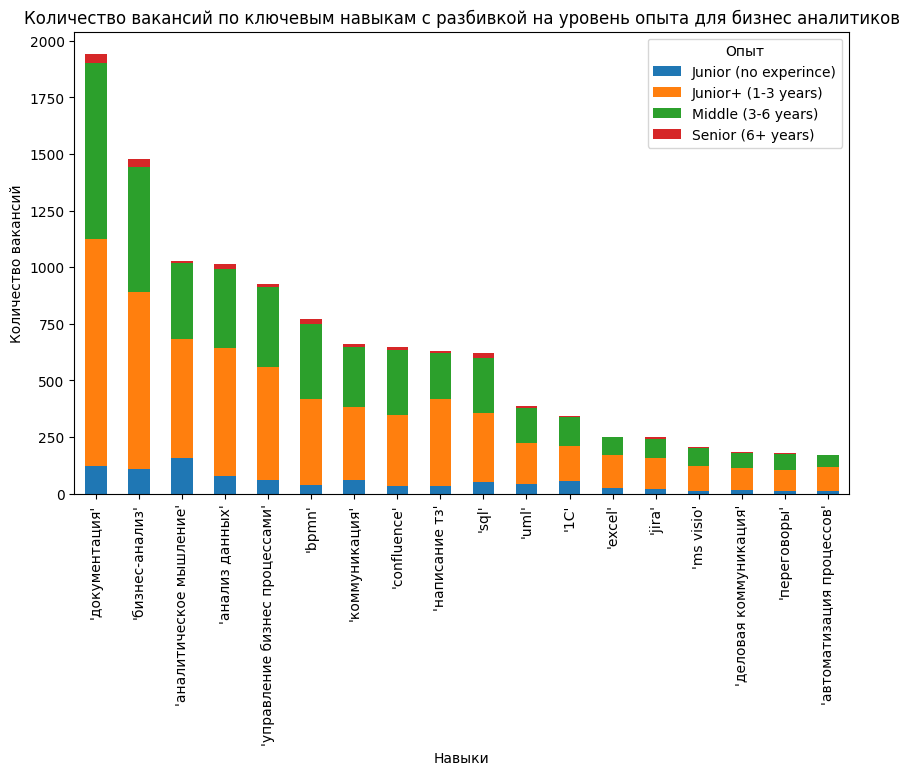

In [64]:
# Создание столбчатой диаграммы с накоплением
sorted_pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Настройка заголовка и меток осей
plt.title('Количество вакансий по ключевым навыкам с разбивкой на уровень опыта для бизнес аналитиков')
plt.xlabel('Навыки')
plt.ylabel('Количество вакансий')

# Отображение легенды
plt.legend(title='Опыт')

# Отображение диаграммы
plt.show()

Работодатели ищут бизнес аналитиков, которые умеют работать с документацией, могут осуществлять бизнес-анализ, работать с бизнес-процессами, автоматизировать их, писать технические задания, эффективно коммуницировать с коллегами, вести переговоры.

Также для бизнес-аналитиков важно обладать аналитическим мышлением, уметь работать с confluence и jira, работать с bpmn, uml, ms visio, уметь писать sql запросы, быть знакомым с 1С и Excel.

При этом для junior специалиста с опытом от года важнее (чем для других грейдов) умение грамотно составлять тз, а junior без опыта работодатель будет в первую очередь проверять на аналитическое мышление, умение работать с документацией и sql. Для senior специалиста по данным с hh не так важно знание excel.

In [65]:
aa = df1_copy.loc[df1_copy['df']=='data_analyst'].pivot_table(index=['df','experience'], aggfunc='sum')

# Отбираем 18 столбцов с наибольшими суммами значений
top_10_columns = aa.sum().nlargest(18).index

# Сортируем столбцы и оставляем только топ-10
sorted_pivot_table = aa[top_10_columns]


sorted_pivot_table.reset_index(inplace=True)
sorted_pivot_table = sorted_pivot_table.drop(columns=['df'])

sorted_pivot_table.set_index('experience', inplace=True)

sorted_pivot_table2 = sorted_pivot_table.T
sorted_pivot_table2

<ipython-input-65-58158ca69cbc>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  aa = df1_copy.loc[df1_copy['df']=='data_analyst'].pivot_table(index=['df','experience'], aggfunc='sum')


experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
'sql',6,230,210,14
'python',7,181,175,14
'анализ данных',6,135,129,10
'pandas',7,91,92,3
'bi-системы ',3,92,78,2
'аналитическое мышление',7,71,42,2
'документация',1,53,57,2
'коммуникация',3,44,52,5
'tableau',0,41,33,0
'a/b тесты',0,27,35,4


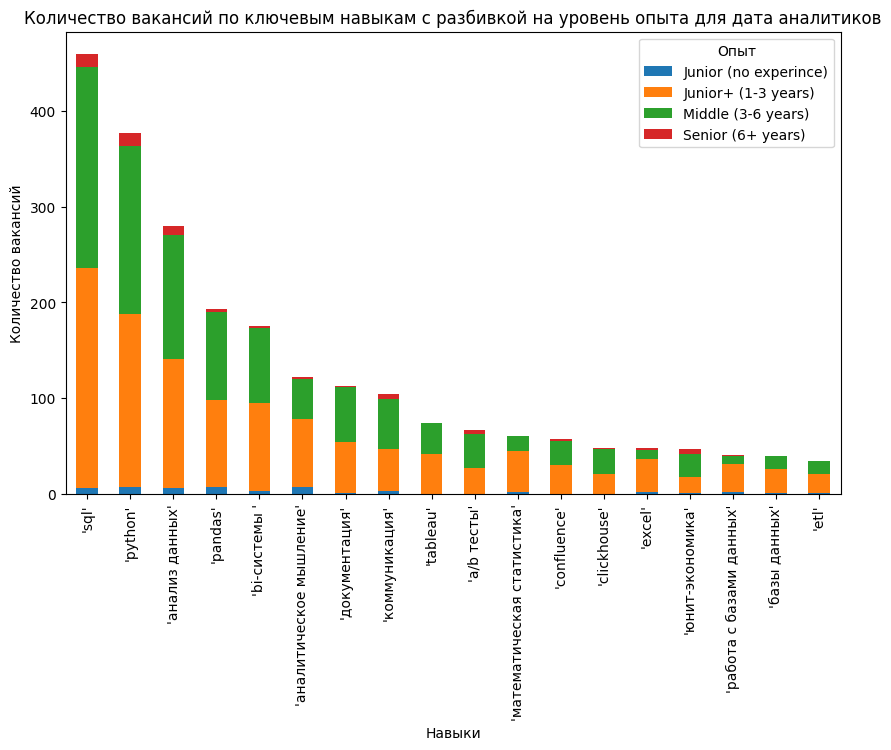

In [66]:
# Создание столбчатой диаграммы с накоплением
sorted_pivot_table2.plot(kind='bar', stacked=True, figsize=(10, 6))

# Настройка заголовка и меток осей
plt.title('Количество вакансий по ключевым навыкам с разбивкой на уровень опыта для дата аналитиков')
plt.xlabel('Навыки')
plt.ylabel('Количество вакансий')

# Отображение легенды
plt.legend(title='Опыт')

# Отображение диаграммы
plt.show()

На вакансии дата аналитиков работодатели ищут людей, которые умеют работать с sql-запросами, python, pandas, bi-системами, tableau, confluence, clickhouse, excel, etl, обладают аналитическим мышлением, разбираются в документации, математической статистике, а/б-тестах, юнит-экономике, базах данных, также работодатели выделяют навык коммуникации.

При этом sql, python, pandas, excel и аналитическое мышление - навыки, которые важно иметь junior специалисту без опыта. От senior специалиста не требуют в описании вакансии знания tableau, математической статистики и умения работать с базами данных.

Если сравнивать требования к бизнес аналитикам и дата аналитикам, то заметно, что от бизнес аналитиков чаще требуют хорошо развитых навыков коммуникации, переговоров, взаимодействия с другими подразделениями и понимания теории построения бизнес-процессов, чтобы писать тех задания, анализировать и модернизировать процессы.
Но для дата аналитиков будто важнее обладание конкретными техническими навыками (python, sql, excel).

### Анализ типичного места работы для бизнес аналитиков и дата аналитиков (Топ-работодателей, тип занятости, график работы)

In [67]:
aa = df1.pivot_table(index='employer', values='id', columns='df', aggfunc='count').sort_values(by='business_analyst', ascending=False)
display(aa.head(10))
aa.sort_values(by='data_analyst', ascending=False).head(10)

df,business_analyst,data_analyst
employer,,
Банк ВТБ (ПАО),88.0,1.0
Aston,66.0,4.0
СБЕР,58.0,101.0
"МАГНИТ, Розничная сеть",56.0,10.0
Комус,38.0,1.0
Ozon,36.0,5.0
"Иннотех, Группа компаний",32.0,2.0
Тинькофф,32.0,NaN
Т1,32.0,1.0


df,business_analyst,data_analyst
employer,,
СБЕР,58.0,101.0
WILDBERRIES,8.0,36.0
МТС,21.0,32.0
Playrix,6.0,21.0
"МАГНИТ, Розничная сеть",56.0,10.0
«UZUM TECHNOLOGIES».,3.0,10.0
КАЗАНЬЭКСПРЕСС,NaN,10.0
USETECH,3.0,9.0
Райффайзен Банк,2.0,9.0


Банк ВТБ, Aston, Сбер, Магнит, Комус, Ozon, Иннотех, Тинькофф, Т1 и ПСБ за 4 месяца разместили больше всего вакансий для бизнес аналитиков.

При этом СБЕР, Wildberries, МТС, Playrix  и Магнит за исследуемый период разместили больше других организаций вакансий для дата аналитиков.

In [68]:
# строю сводную по типу занятости
df1.pivot_table(index='employment',
                columns='df',
                values='id',
                aggfunc='count')

df,business_analyst,data_analyst
employment,,
Полная занятость,4024,777
Проектная работа,19,2
Стажировка,120,2
Частичная занятость,8,5


В основном и бизнес аналитиков, и дата аналитиков на hh ищут на полную занятость, для бизнес аналитиков за 4 месяца размещено 120 предложений о стажировке, когда для дата аналитиков всего 2.

In [69]:
# смотрю какие компании в основном предлагают стажировки
df1.query('employment == "Стажировка"')\
    .pivot_table(index='employer', values='id', columns='df', aggfunc='count').sort_values(by='business_analyst', ascending=False).head()

df,business_analyst,data_analyst
employer,,
Aston,60.0,NaN
Changellenge,5.0,NaN
М.Видео-Эльдорадо,5.0,NaN
"СИБУР, Группа компаний",4.0,NaN
Kept (Кэпт),3.0,NaN


В основном стажировки для бизнес аналитиков предлагает компания Aston.


In [70]:
# строю сводную по графику работы
aa = df1.pivot_table(index='schedule',
                columns='df',
                values='id',
                aggfunc='count')
aa

df,business_analyst,data_analyst
schedule,,
Гибкий график,115,26
Полный день,3335,598
Сменный график,4,1
Удаленная работа,717,161


In [71]:
# считаю сумму по колонкам
column_sums = aa.sum()

# считаю процентное соотношение
bb = (aa / column_sums) * 100
bb.round(2)

df,business_analyst,data_analyst
schedule,,
Гибкий график,2.76,3.31
Полный день,79.96,76.08
Сменный график,0.10,0.13
Удаленная работа,17.19,20.48


Около 80% вакансий для бизнес аналитиков размещены на условиях полного рабочего дня, 17% - предложения об удаленной работе, 2,7% - гибкий график.

Для дата аналитиков: 76% - полный рабочий день, 20% - удаленная работа, 3,3% - гибкий график.

То есть полный рабочий день предлагают немного чаще для бизнес аналитиков, а более свободные графики (удаленная работа и гибкий график) чаще предлагают дата аналитикам. При этом ни бизнес аналитики, ни дата аналитики практически не работают по сменному графику.

### Анализ регионального распределения

In [72]:
df1.pivot_table(index='df', values='id', aggfunc='count')

,id
df,
business_analyst,4171
data_analyst,786


В принципе по рынку за исследуемый период (4 месяца) было размещено в 5 раз больше вакансий для бизнес аналитиков, чем для дата аналитиков.

In [73]:
# смотрю топ-10 городов по количеству размещенных вакансий
aa = df1.pivot_table(index='area', values='id', aggfunc='count').sort_values(by='id', ascending=False).head(10)
aa

,id
area,
Москва,2780
Санкт-Петербург,534
Минск,204
Екатеринбург,151
Казань,126
Новосибирск,108
Краснодар,102
Нижний Новгород,73
Алматы,66


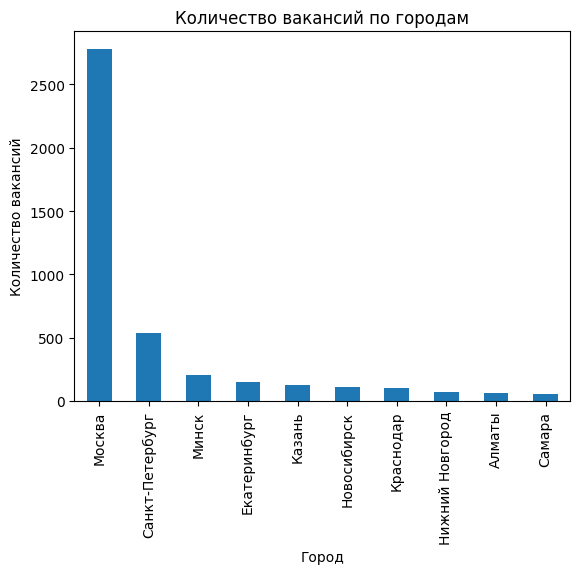

In [74]:
aa.plot(kind='bar', legend=None)
plt.title('Количество вакансий по городам')
plt.xlabel('Город')
plt.ylabel('Количество вакансий')
plt.show()

In [75]:
# смотрю распределение количестчва вакансий для БА и ДА по топ-10городам по общему числу вакансий
bb = df1.query('area in @aa.index').pivot_table(index='area',
                                                columns='df',
                                                values='id',
                                                aggfunc='count').sort_values(by='business_analyst', ascending=False)
bb

df,business_analyst,data_analyst
area,,
Москва,2266,514
Санкт-Петербург,436,98
Минск,173,31
Екатеринбург,135,16
Казань,116,10
Новосибирск,99,9
Краснодар,96,6
Нижний Новгород,71,2
Самара,52,1


In [76]:
bb = bb.reset_index()
bb

df,area,business_analyst,data_analyst
0,Москва,2266,514
1,Санкт-Петербург,436,98
2,Минск,173,31
3,Екатеринбург,135,16
4,Казань,116,10
5,Новосибирск,99,9
6,Краснодар,96,6
7,Нижний Новгород,71,2
8,Самара,52,1
9,Алматы,44,22


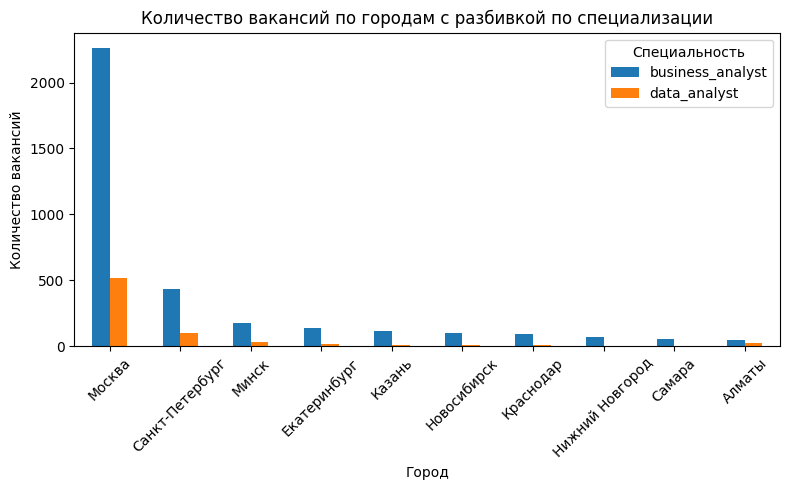

In [77]:
bb.plot(kind='bar', x='area', figsize=(8, 5))
plt.title('Количество вакансий по городам с разбивкой по специализации')
plt.xlabel('Город')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)  # Поворот меток оси X для лучшей читаемости
plt.legend(title='Специальность')  # Добавление легенды
plt.tight_layout()  # Автоматическая корректировка расположения элементов
plt.show()

Больше всего вакансий размещено в Москве, при этом в каждом городе вакансий для бизнес аналитиков значительно больше, чем для аналитиков данных.

### Анализ вакансий по грейдам и зарплатам

In [78]:
# смотрю зависимость категории зп от грейда
aa = df1.pivot_table(index='salary_bin', columns=['df', 'experience'], aggfunc='count', values='id')
aa

df                                business_analyst                      \
experience                   Junior (no experince) Junior+ (1-3 years)   
salary_bin                                                               
1. ЗП не указана                             191.0              1529.0   
2. Меньше 100 тысяч                          133.0               217.0   
3. От 100 тысяч до 200 тысяч                  39.0               284.0   
4. От 200 тысяч до 300 тысяч                   1.0                82.0   
5. Больше 300 тыс                              NaN                10.0   

df                                                                 \
experience                   Middle (3-6 years) Senior (6+ years)   
salary_bin                                                          
1. ЗП не указана                         1285.0              71.0   
2. Меньше 100 тысяч                        24.0               NaN   
3. От 100 тысяч до 200 тысяч              142.0               1.0   
4. От 200 тысяч до 300 тысяч              109.0              10.0   
5. Больше 300 тыс                          36.0               7.0   

df                                    data_analyst                      \
experience                   Junior (no experince) Junior+ (1-3 years)   
salary_bin                                                               
1. ЗП не указана                              16.0               338.0   
2. Меньше 100 тысяч                            6.0                 9.0   
3. От 100 тысяч до 200 тысяч                   1.0                19.0   
4. От 200 тысяч до 300 тысяч                   1.0                15.0   
5. Больше 300 тыс                              1.0                 6.0   

df                                                                 
experience                   Middle (3-6 years) Senior (6+ years)  
salary_bin                                                         
1. ЗП не указана                          316.0              11.0  
2. Меньше 100 тысяч                         NaN               NaN  
3. От 100 тысяч до 200 тысяч                9.0               NaN  
4. От 200 тысяч до 300 тысяч               14.0               NaN  
5. Больше 300 тыс                          16.0               8.0

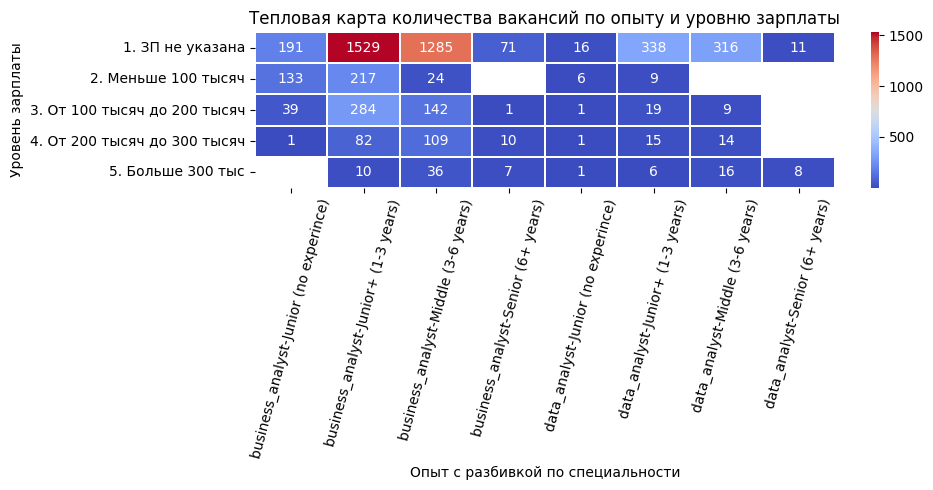

In [79]:
# Создаем тепловую карту
plt.figure(figsize=(10, 5))
sns.heatmap(aa, cmap='coolwarm', annot=True, fmt='g', linewidths=0.3)
plt.title('Тепловая карта количества вакансий по опыту и уровню зарплаты')
plt.xlabel('Опыт с разбивкой по специальности')
plt.ylabel('Уровень зарплаты')
plt.xticks(rotation=75)  # Поворот меток оси X для лучшей читаемости
plt.yticks(rotation=0)  # Поворот меток оси Y для лучшей читаемости
plt.tight_layout()  # Автоматическая корректировка расположения элементов
plt.show()

Чаще всего зарплата не указывается на НН, при этом есть единичные объявления со слишком низкой зарплатой для грейда или со слишком высокой.


In [80]:
# смотрю распределение зарплат по Москве
mos = df1.query('area=="Москва"').pivot_table(index='salary_bin',
                              columns=['experience', 'df'],
                              aggfunc='count', values='id')
mos

experience                   Junior (no experince)               \
df                                business_analyst data_analyst   
salary_bin                                                        
1. ЗП не указана                              75.0         13.0   
2. Меньше 100 тысяч                           30.0          4.0   
3. От 100 тысяч до 200 тысяч                   6.0          NaN   
4. От 200 тысяч до 300 тысяч                   1.0          1.0   
5. Больше 300 тыс                              NaN          1.0   

experience                   Junior+ (1-3 years)               \
df                              business_analyst data_analyst   
salary_bin                                                      
1. ЗП не указана                           838.0        227.0   
2. Меньше 100 тысяч                         33.0          2.0   
3. От 100 тысяч до 200 тысяч               121.0         14.0   
4. От 200 тысяч до 300 тысяч                62.0         11.0   
5. Больше 300 тыс                            9.0          6.0   

experience                   Middle (3-6 years)               \
df                             business_analyst data_analyst   
salary_bin                                                     
1. ЗП не указана                          849.0        204.0   
2. Меньше 100 тысяч                         1.0          NaN   
3. От 100 тысяч до 200 тысяч               74.0          3.0   
4. От 200 тысяч до 300 тысяч               86.0          6.0   
5. Больше 300 тыс                          20.0          9.0   

experience                   Senior (6+ years)               
df                            business_analyst data_analyst  
salary_bin                                                   
1. ЗП не указана                          48.0          8.0  
2. Меньше 100 тысяч                        NaN          NaN  
3. От 100 тысяч до 200 тысяч               NaN          NaN  
4. От 200 тысяч до 300 тысяч               7.0          NaN  
5. Больше 300 тыс                          6.0          5.0

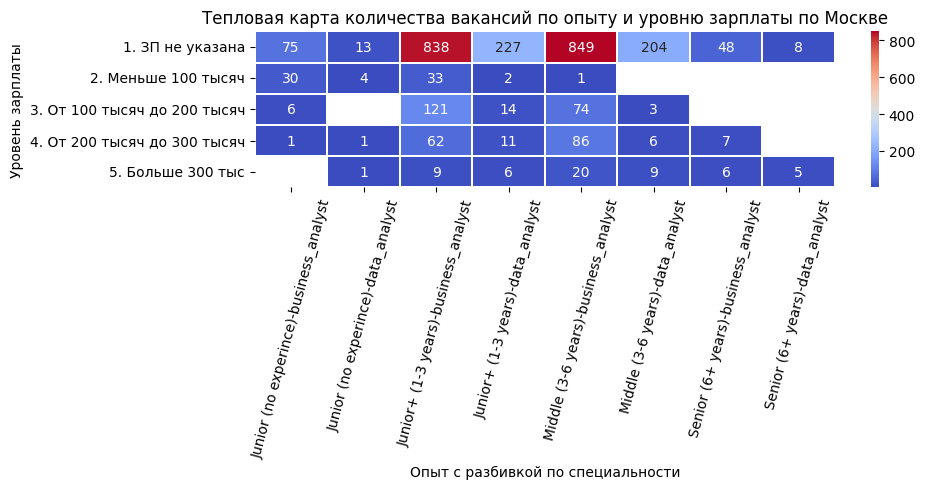

In [81]:
# Создаем тепловую карту
plt.figure(figsize=(10, 5))
sns.heatmap(mos, cmap='coolwarm', annot=True, fmt='g', linewidths=0.3)
plt.title('Тепловая карта количества вакансий по опыту и уровню зарплаты по Москве')
plt.xlabel('Опыт с разбивкой по специальности')
plt.ylabel('Уровень зарплаты')
plt.xticks(rotation=75)  # Поворот меток оси X для лучшей читаемости
plt.yticks(rotation=0)  # Поворот меток оси Y для лучшей читаемости
plt.tight_layout()  # Автоматическая корректировка расположения элементов
plt.show()

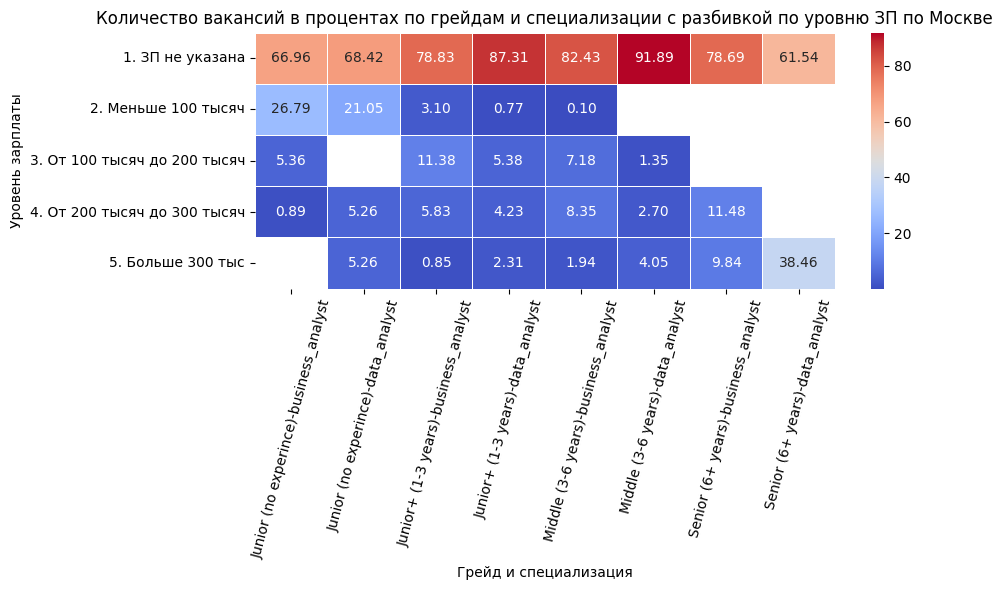

In [82]:
# строю визуализацию, показывающую соотношение распределения зарплаты в процентах в разрезе специализации и грейда

# Вычисляем сумму в каждом столбце
col_sum = mos.sum()

# Рассчитываем процентное соотношение для каждой ячейки в пределах столбца
mos_percent = mos.divide(col_sum, axis=1) * 100

# Создаем тепловую карту
plt.figure(figsize=(10, 6))
sns.heatmap(mos_percent, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Количество вакансий в процентах по грейдам и специализации с разбивкой по уровню ЗП по Москве')
plt.xlabel('Грейд и специализация')
plt.ylabel('Уровень зарплаты')
plt.xticks(rotation=75)  # Поворот меток оси X для лучшей читаемости
plt.yticks(rotation=0)  # Поворот меток оси Y для лучшей читаемости
plt.tight_layout()  # Автоматическая корректировка расположения элементов
plt.show()

Для бизнес аналитиков по всем грейдам (кроме сеньоров) чаще в вакансии указывают уровень зарплаты, чем для дата аналитиков.
При этом если смотреть процент по грейду и специализации, на каждом грейде процент уровня зарплаты "Больше 300 тыс" для дата аналитиков выше, чем для бизнес аналитиков. Но стоит учитывать, что данных для анализа мало, и наличие 5% вакансий среди джуниоров без опыта с зарплатой свыше 300 тыс. руб. дата аналитиков обусловлено всего одной вакансией за 4 месяца.

### Помесячная динамика количества вакансий по грейдам и специализации

In [83]:
# создаю столбец с месяцем публикации
df1['month_year'] = df1['published_at'].dt.strftime('%Y-%m')
df1.head()

,id,name,published_at,type,employer,department,area,experience,key_skills,schedule,employment,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,df,month_year
0,49470036,Бизнес-аналитик,2024-01-29 21:09:56,Открытая,ICS Consulting,NaN,Москва,Junior+ (1-3 years),"['умение работать с людьми', 'документация', '...",Полный день,Полная занятость,90000.0,120000.0,3. От 100 тысяч до 200 тысяч,"Грамотность, Деловая переписка, Умение работат...",business_analyst,2024-01
1,55186681,"Проектный бизнес-аналитик 1С (ERP, УХ, КА, УТ,...",2024-01-10 11:00:30,Открытая,Первый Бит,NaN,Москва,Middle (3-6 years),"['1С', '1С', '1С', '1c: финансы', 'работа в ко...",Полный день,Полная занятость,NaN,NaN,1. ЗП не указана,"Управление проектами, Бизнес-анализ, Системный...",business_analyst,2024-01
2,67043806,Бизнес-аналитик,2023-11-15 17:46:22,Открытая,Digital Design,NaN,Москва,Junior+ (1-3 years),"['разработка проектной документации', 'электро...",Полный день,Полная занятость,NaN,NaN,1. ЗП не указана,"Разработка проектной документации, Разработка ...",business_analyst,2023-11
3,67345392,"Бизнес-аналитик (по логистике морских портов, ...",2024-01-17 12:53:15,Открытая,СОЛВО,NaN,Санкт-Петербург,Middle (3-6 years),"['idef0', 'документация', 'аналитическое мышле...",Полный день,Полная занятость,NaN,NaN,1. ЗП не указана,"UML, BPMN, IDEF0, Английский язык, IDEF",business_analyst,2024-01
4,67498251,Бизнес-аналитик в Банк,2024-01-29 12:05:14,Открытая,Сателл ИТ,NaN,Москва,Junior+ (1-3 years),"['бизнес-анализ', 'документация']",Удаленная работа,Полная занятость,200000.0,NaN,4. От 200 тысяч до 300 тысяч,Бизнес-анализ,business_analyst,2024-01


In [86]:
din_for_ba = df1.query('df == "business_analyst"').pivot_table(index='month_year',
                     columns=['experience'],
                     values='id',
                     aggfunc='count').fillna(0)
din_for_ba

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
month_year,,,,
2023-10,23,160,103,6
2023-11,124,603,441,19
2023-12,72,456,330,22
2024-01,145,903,722,42


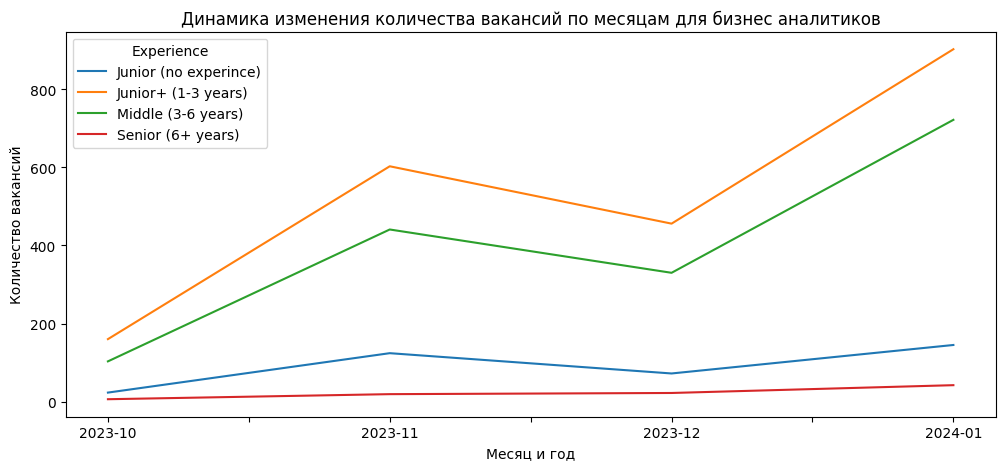

In [87]:
# строю графика
din_for_ba.plot(kind='line', figsize=(12, 5))

# настройка заголовка и меток осей
plt.title('Динамика изменения количества вакансий по месяцам для бизнес аналитиков')
plt.xlabel('Месяц и год')
plt.ylabel('Количество вакансий')

# добавление легенды
plt.legend(title='Experience')

# отображение графика
plt.show()

В ноябре количество вакансий для бизнес аналитиков значительно увеличилось по сравнению с октябрем для джуниоров со стажем от года до 3х лет и для мидл специалистов со стажем от 3 до 6 лет. Рост количества вакансий для специалистов без опыта был не такой значительный.

В декабре для джуниоров и мидлов количество вакансий снизилось по сравнению с ноябрем, но в январе возросло.

Вакансий для сеньор специалистов стабильно небольшое количество за исследуемый период.



In [90]:
# строю аналогичную таблицу для дата аналитиков, не включаю данный за сентябрь
# так как в датасете есть данные только начиная с 26.09
din_for_da = df1.query('df == "data_analyst" & month_year!="2023-09"').pivot_table(index='month_year',
                     columns=['experience'],
                     values='id',
                     aggfunc='count').fillna(0)
din_for_da

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
month_year,,,,
2023-10,6,97,83,5
2023-11,6,84,89,3
2023-12,5,74,84,5
2024-01,7,122,95,6


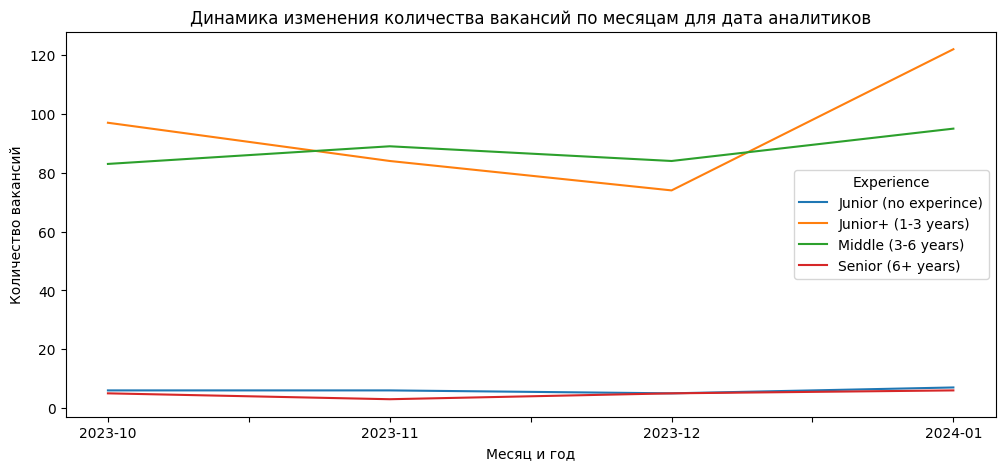

In [91]:
# строю графика
din_for_da.plot(kind='line', figsize=(12, 5))

# настройка заголовка и меток осей
plt.title('Динамика изменения количества вакансий по месяцам для дата аналитиков')
plt.xlabel('Месяц и год')
plt.ylabel('Количество вакансий')

# добавление легенды
plt.legend(title='Experience')

# отображение графика
plt.show()

На hh вакансий для дата аналитиков значительно меньше, чем для бизнес аналитиков.

При таком количестве данных по сеньорам и джунам некорректно делать вывод в целом по рынку труда, но по вакансиям для джуниоров с опытом и мидлов можно проследить закономерности.

С октября по декабрь 2023 года количество вакансий для джуниоров с опытом от года и мидлов с опытом от 3х лет на hh было примерно равноценное, а к январю вакансий для джунов стало значительно больше, чем для мидлов.

## Общий вывод по исследованию

Датасет содержит данные с 26 сентября 2023 года по 30 января 2024 года.

Среди бизнес аналитиков наибольший интерес работодателей вызывают джуниоры с опытом от 1 года до 3 лет и мидл специалисты с опытом работы от 3 лет до 6. Аналогичная ситуация наблюдается и среди дата аналитиков, однако количество вакансий для дата аналитиков в целом значительно меньше, чем для бизнес аналитиков.

Требуемые навыки для бизнес аналитиков включают работу с документацией, бизнес-анализ, работу с бизнес-процессами, автоматизацию, написание технических заданий, а также умение эффективно общаться и вести переговоры. Для дата аналитиков востребованы навыки работы с SQL-запросами, Python, Pandas, BI-системами, Tableau, Confluence, ClickHouse, Excel и ETL, а также аналитическое мышление и знание математической статистики.

Крупные компании, такие как Банк ВТБ, Aston, Сбер, Магнит, Комус, Ozon, Иннотех, Тинькофф, Т1 и ПСБ, в течение четырех месяцев разместили наибольшее количество вакансий для бизнес аналитиков. В то же время компании СБЕР, Wildberries, МТС, Playrix и Магнит разместили больше всего вакансий для дата аналитиков.

Практически все вакансии для бизнес аналитиков и дата аналитиков предлагают полную занятость. Однако вакансии для дата аналитиков чаще предлагают возможность удаленной работы или гибкий график.

За исследуемый период (4 месяца) количество вакансий для бизнес аналитиков превышает количество вакансий для дата аналитиков в 5 раз. Большинство вакансий размещены в Москве, и количество вакансий для бизнес аналитиков в каждом городе значительно превышает количество вакансий для дата аналитиков.

Информация о заработной плате чаще всего не указывается в объявлениях о вакансиях. Однако иногда встречаются объявления с недостаточно высокой или слишком высокой заработной платой для определенного уровня квалификации. Например, для дата аналитиков чаще указывается зарплата "Больше 300 тыс" для всех уровней опыта, чем для бизнес аналитиков.

Сентябрьские данные о вакансиях являются наименее полными, так как доступны с 26 сентября. В ноябре количество вакансий для бизнес аналитиков существенно увеличивается по сравнению с октябрем, в то время как количество вакансий для дата аналитиков в это время практически не изменяется. В январе количество вакансий для дата аналитиков увеличивается для джуниоров+ (с опытом от 1 до 3 лет), а для бизнес аналитиков вакансий становится меньше к декабрю и растет в январе.

Из вышесказанного следует, что дата аналитикам для получения работы требуется уверенное знание технических инструментов. Работу стоит искать в ноябре или январе, а не стоит в декабре, так как вакансий в этот месяц значительно меньше, чем в соседних. Работу будет легче найти если включать в рассматриваемые вакансии предложения с графиком "полный рабочий день", потому что большинство вакансий для обоих направлений размещено именно с таким условием.

Так же, возможно, дата аналитикам стоит использовать дополнительные каналы для поиска заботы, так как в hh.ru вакансий для дата аналитиков в сравнении с бизнес аналитиками значительно меньше.